In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Need data on numbers killed, numbers killed and assaulted (subtract number killed to isolate assaulted only), employment by region (to calculate percentages).

In [3]:
#relevant 2019 data (granularity: year)
leoka_19 = pd.read_excel('LEOKA_19.xls')
leoka_19 = leoka_19.iloc[2:,:]
leoka_19 = pd.DataFrame(leoka_19.values[1:], columns=leoka_19.iloc[0])

killed_19 = pd.read_excel('killed_officers_19.xls')
killed_19 = killed_19.iloc[2:,:]
killed_19 = pd.DataFrame(killed_19.values[1:], columns=killed_19.iloc[0])
killed_19

2,Area,Total,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Number of victim officers,511,55.0,72.0,49.0,27.0,51.0,41.0,66.0,46.0,56.0,48.0
1,NORTHEAST,45,3.0,10.0,6.0,2.0,8.0,4.0,4.0,3.0,4.0,1.0
2,New England,9,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0
3,Connecticut,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maine,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66,American Samoa,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Guam,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Mariana Islands,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Puerto Rico,25,3.0,2.0,5.0,0.0,4.0,4.0,2.0,2.0,1.0,2.0


In [11]:
#2019 data: granularity: month (consult paper that used LEOKA to find the location of this data)
leoka_18_monthly = pd.read_stata('ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2018.dta')
leoka_18_monthly.shape

(292452, 256)

In [12]:
for i in leoka_18_monthly.columns:
    print(i)

slice = leoka_18_monthly.head(50)
slice[['population', 'population_group', 'male_employees_officers', 'female_employees_officers', 'total_employees_officers', 'officers_killed_total']]

ori
agency_name
state
state_abb
number_of_months_reported
year
month
date
ori9
fips_state_code
fips_county_code
fips_state_county_code
fips_place_code
agency_type
crosswalk_agency_name
census_name
longitude
latitude
address_name
address_street_line_1
address_street_line_2
address_city
address_state
address_zip_code
population
population_group
country_division
msa
report_indicator
record_indicator
month_indicator
covered_by
shift_data
no_male_female_breakdown
assault_injury_indicator
assault_no_injury_indicator
male_employees_officers
female_employees_officers
total_employees_officers
male_employees_civilians
female_employees_civilians
total_employees_civilians
male_employees_total
female_employees_total
total_employees_total
officers_killed_total
officers_killed_by_felony
officers_killed_by_accident
assaults_with_injury_gun
assaults_with_injury_knife
assaults_with_injury_oth_weap
assaults_with_injury_unarmed
assaults_with_injury_total
assaults_no_injury_gun
assaults_no_injury_knife
ass

,population,population_group,male_employees_officers,female_employees_officers,total_employees_officers,officers_killed_total
0,291992,"city 250,000 thru 499,999",369,58,427,0
1,291992,"city 250,000 thru 499,999",369,58,427,0
2,291992,"city 250,000 thru 499,999",369,58,427,0
3,291992,"city 250,000 thru 499,999",369,58,427,0
4,291992,"city 250,000 thru 499,999",369,58,427,0
5,291992,"city 250,000 thru 499,999",369,58,427,0
6,291992,"city 250,000 thru 499,999",369,58,427,0
7,291992,"city 250,000 thru 499,999",369,58,427,0
8,291992,"city 250,000 thru 499,999",369,58,427,0
9,291992,"city 250,000 thru 499,999",369,58,427,0


In [13]:
leoka_18_monthly = leoka_18_monthly.iloc[:,:-198]
leoka_18_monthly.shape

(292452, 58)

In [14]:
leoka_18_monthly['assaults_total'] = leoka_18_monthly['assaults_no_injury_total'] + leoka_18_monthly['assaults_with_injury_total']
leoka_18_monthly.shape

#assaulted or killed --> 19196 rows now (so close to 2019? 19148 :o)
leoka_18_monthly = leoka_18_monthly.loc[(leoka_18_monthly['assaults_total'] > 0) | (leoka_18_monthly['officers_killed_total'] > 0)]
leoka_18_monthly.shape

(19196, 59)

In [15]:
#46 officer deaths in 2019
#55 officer deaths in 2018
leoka_18_monthly.loc[leoka_18_monthly['officers_killed_total'] > 0]

,ori,agency_name,state,state_abb,number_of_months_reported,year,month,date,ori9,fips_state_code,...,assaults_with_injury_knife,assaults_with_injury_oth_weap,assaults_with_injury_unarmed,assaults_with_injury_total,assaults_no_injury_gun,assaults_no_injury_knife,assaults_no_injury_oth_weap,assaults_no_injury_unarmed,assaults_no_injury_total,assaults_total
10330,AR07200,washington,arkansas,AR,12,2018,november,2018-11-01,AR0720000,05,...,0,0,0,0,0,0,0,0,0,0
12135,AZ01201,nogales,arizona,AZ,12,2018,april,2018-04-01,AZ0120100,04,...,0,0,0,0,0,0,0,0,0,0
12924,AZDI067,hualapai tribal,arizona,AZ,12,2018,january,2018-01-01,AZDI06700,04,...,0,0,1,1,0,0,0,1,1,2
16694,CA01955,pomona,california,CA,12,2018,march,2018-03-01,CA0195500,06,...,0,0,2,3,0,0,0,1,1,4
17234,CA02100,marin,california,CA,12,2018,march,2018-03-01,CA0210000,06,...,0,0,0,0,0,0,0,0,0,0
19772,CA03455,rancho cordova,california,CA,12,2018,september,2018-09-01,CA0345500,06,...,0,0,1,2,2,0,0,0,2,4
22819,CA04899,hp: solano county,california,CA,12,2018,august,2018-08-01,CA0489900,06,...,0,0,0,0,0,0,0,0,0,0
23050,CA05000,stanislaus,california,CA,12,2018,november,2018-11-01,CA0500000,06,...,0,0,2,2,0,0,0,0,0,2
23087,CA05003,newman,california,CA,12,2018,december,2018-12-01,CA0500300,06,...,0,0,0,0,0,0,0,0,0,0
23734,CA05607,thousand oaks,california,CA,12,2018,november,2018-11-01,CA0560700,06,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#now, we look at leoka_18_monthly as a whole and use the officers_killed column = 1/0 as the label for the regression
arrests_2018 = pd.read_stata('ucr_arrests_monthly_index_1974_2018_dta/ucr_arrests_monthly_index_crimes_age_2018.dta')
arrests_2018.shape

(152713, 629)

In [17]:
arrests_2018.head(5)

,ori,ori9,number_of_months_reported,num_months_murder,num_months_rape,num_months_robbery,num_months_agg_assault,num_months_burglary,num_months_theft,num_months_mtr_veh_theft,...,theft_tot_male,theft_tot_male_adult,theft_tot_male_juv,theft_tot_over_64,theft_tot_under_10,juv_handled_within_department,juv_referred_to_juv_court,juv_referred_to_welfare,juv_referred_to_police,juv_referred_to_crim_court
0,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,40.0,32.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,58.0,54.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,55.0,53.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,50.0,46.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,56.0,54.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
for i in arrests_2018.columns:
    print(i)

ori
ori9
number_of_months_reported
num_months_murder
num_months_rape
num_months_robbery
num_months_agg_assault
num_months_burglary
num_months_theft
num_months_mtr_veh_theft
num_months_arson
population
agency_name
year
month
state
state_abb
population_group
country_division
fips_state_code
fips_county_code
fips_state_county_code
fips_place_code
covered_by
agg_assault_female_10_12
agg_assault_female_13_14
agg_assault_female_15
agg_assault_female_16
agg_assault_female_17
agg_assault_female_18
agg_assault_female_19
agg_assault_female_20
agg_assault_female_21
agg_assault_female_22
agg_assault_female_23
agg_assault_female_24
agg_assault_female_25_29
agg_assault_female_30_34
agg_assault_female_35_39
agg_assault_female_40_44
agg_assault_female_45_49
agg_assault_female_50_54
agg_assault_female_55_59
agg_assault_female_60_64
agg_assault_female_over_64
agg_assault_female_under_10
agg_assault_male_10_12
agg_assault_male_13_14
agg_assault_male_15
agg_assault_male_16
agg_assault_male_17
agg_assault_

In [19]:
arrests_2018.iloc[:,:15]

,ori,ori9,number_of_months_reported,num_months_murder,num_months_rape,num_months_robbery,num_months_agg_assault,num_months_burglary,num_months_theft,num_months_mtr_veh_theft,num_months_arson,population,agency_name,year,month
0,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,291992.0,anchorage,2018.0,april
1,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,291992.0,anchorage,2018.0,august
2,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,291992.0,anchorage,2018.0,december
3,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,291992.0,anchorage,2018.0,february
4,AK00101,AK0010100,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,291992.0,anchorage,2018.0,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152708,FL05809,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sarasota county schools,2018.0,
152709,NY04569,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,galway village,2018.0,
152710,SC02020,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,foxville and northern ra,2018.0,
152711,NJ02255,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dept of corr internal af,2018.0,


In [20]:
arrests_2018['total_arrests'] = arrests_2018['theft_tot_arrests'] + arrests_2018['robbery_tot_arrests'] + arrests_2018['rape_tot_arrests'] + arrests_2018['murder_tot_arrests'] + arrests_2018['mtr_veh_theft_tot_arrests'] + arrests_2018['burglary_tot_arrests'] + arrests_2018['arson_tot_arrests'] + arrests_2018['agg_assault_tot_arrests']

/var/folders/5h/mg9jv4jj4_zc1dsmj4zsf1vm0000gn/T/ipykernel_49649/2298288866.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  arrests_2018['total_arrests'] = arrests_2018['theft_tot_arrests'] + arrests_2018['robbery_tot_arrests'] + arrests_2018['rape_tot_arrests'] + arrests_2018['murder_tot_arrests'] + arrests_2018['mtr_veh_theft_tot_arrests'] + arrests_2018['burglary_tot_arrests'] + arrests_2018['arson_tot_arrests'] + arrests_2018['agg_assault_tot_arrests']


In [21]:
leoka_18_monthly.head(10)

,ori,agency_name,state,state_abb,number_of_months_reported,year,month,date,ori9,fips_state_code,...,assaults_with_injury_knife,assaults_with_injury_oth_weap,assaults_with_injury_unarmed,assaults_with_injury_total,assaults_no_injury_gun,assaults_no_injury_knife,assaults_no_injury_oth_weap,assaults_no_injury_unarmed,assaults_no_injury_total,assaults_total
0,AK00101,anchorage,alaska,AK,12,2018,january,2018-01-01,AK0010100,02,...,0,1,0,1,0,0,3,25,28,29
1,AK00101,anchorage,alaska,AK,12,2018,february,2018-02-01,AK0010100,02,...,0,0,2,2,0,0,8,15,23,25
2,AK00101,anchorage,alaska,AK,12,2018,march,2018-03-01,AK0010100,02,...,0,0,8,8,0,2,13,17,32,40
3,AK00101,anchorage,alaska,AK,12,2018,april,2018-04-01,AK0010100,02,...,0,2,9,11,0,0,9,19,28,39
4,AK00101,anchorage,alaska,AK,12,2018,may,2018-05-01,AK0010100,02,...,0,1,4,5,0,0,9,20,29,34
5,AK00101,anchorage,alaska,AK,12,2018,june,2018-06-01,AK0010100,02,...,0,1,3,4,2,0,2,17,21,25
6,AK00101,anchorage,alaska,AK,12,2018,july,2018-07-01,AK0010100,02,...,0,2,2,4,2,0,9,27,38,42
7,AK00101,anchorage,alaska,AK,12,2018,august,2018-08-01,AK0010100,02,...,0,0,4,4,0,1,6,27,34,38
8,AK00101,anchorage,alaska,AK,12,2018,september,2018-09-01,AK0010100,02,...,0,0,3,3,5,0,8,28,41,44
9,AK00101,anchorage,alaska,AK,12,2018,october,2018-10-01,AK0010100,02,...,0,1,11,12,1,0,6,28,35,47


In [22]:
result_2018 = pd.merge(leoka_18_monthly, arrests_2018, on=['ori', 'month'], how='left')

In [14]:
result_2018

,ori,agency_name_x,state_x,state_abb_x,number_of_months_reported_x,year_x,month,date,ori9_x,fips_state_code_x,...,theft_tot_male_adult,theft_tot_male_juv,theft_tot_over_64,theft_tot_under_10,juv_handled_within_department,juv_referred_to_juv_court,juv_referred_to_welfare,juv_referred_to_police,juv_referred_to_crim_court,total_arrests
0,AK00101,anchorage,alaska,AK,12,2018,january,2018-01-01,AK0010100,02,...,54.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0
1,AK00101,anchorage,alaska,AK,12,2018,february,2018-02-01,AK0010100,02,...,46.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0
2,AK00101,anchorage,alaska,AK,12,2018,march,2018-03-01,AK0010100,02,...,65.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0
3,AK00101,anchorage,alaska,AK,12,2018,april,2018-04-01,AK0010100,02,...,32.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0
4,AK00101,anchorage,alaska,AK,12,2018,may,2018-05-01,AK0010100,02,...,69.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,WY01900,sweetwater,wyoming,WY,12,2018,july,2018-07-01,WY0190000,56,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19225,WY01900,sweetwater,wyoming,WY,12,2018,october,2018-10-01,WY0190000,56,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN
19226,WY02201,worland,wyoming,WY,12,2018,march,2018-03-01,WY0220100,56,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
19227,WY02201,worland,wyoming,WY,12,2018,june,2018-06-01,WY0220100,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [23]:
#relevant columns: 'officers_killed_total', 'total_arrests'
result_2018['total_arrests'] = result_2018['total_arrests'].fillna(0)
result_2018['assault_indicator'] = (result_2018['assaults_total'] > 0).astype(int)

In [24]:
result_2018[['officers_killed_total', 'total_arrests', 'assault_indicator']].loc[result_2018['officers_killed_total'] > 0]

,officers_killed_total,total_arrests,assault_indicator
591,1,12.0,0
944,1,21.0,0
999,1,0.0,1
1791,1,38.0,1
1956,1,15.0,0
2481,1,23.0,1
3326,1,0.0,0
3377,1,62.0,1
3391,1,2.0,0
3516,1,46.0,0


NameError: name 'result_2018' is not defined

In [26]:
for i in result_2018.dtypes:
    print(i)

object
object
object
object
int8
int16
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int32
object
object
object
object
object
object
object
object
object
object
object
int16
int16
int32
int16
int16
int16
int32
int16
int32
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int16
int16
int16
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
object
object
object
object
object
object
object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
floa

In [25]:
result_2018.to_stata('result_2018.dta')

In [33]:
Anchorage_list = list(result_2018['total_arrests'].iloc[0:12])
Fairbanks_list = list(result_2018['total_arrests'].iloc[12:24])
Juneau_list = list(result_2018['total_arrests'].iloc[24:36])
Ketchikan_list = list(result_2018['total_arrests'].iloc[36:48])

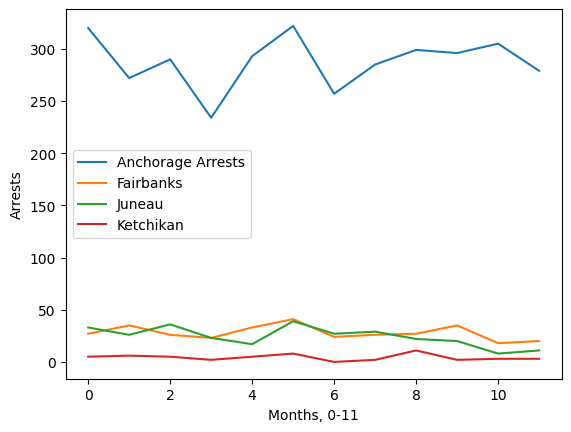

In [36]:
x_values = [i for i in range(12)]
plt.plot(x_values, Anchorage_list, label='Anchorage Arrests')
plt.plot(x_values, Fairbanks_list, label='Fairbanks')
plt.plot(x_values, Juneau_list, label='Juneau')
plt.plot(x_values, Ketchikan_list, label='Ketchikan')

plt.xlabel('Months, 0-11')
plt.ylabel('Arrests')
plt.legend(loc='center left')

In [28]:
result_2018.iloc[22:35]

,ori,agency_name_x,state_x,state_abb_x,number_of_months_reported_x,year_x,month,date,ori9_x,fips_state_code_x,...,theft_tot_male_juv,theft_tot_over_64,theft_tot_under_10,juv_handled_within_department,juv_referred_to_juv_court,juv_referred_to_welfare,juv_referred_to_police,juv_referred_to_crim_court,total_arrests,assault_indicator
22,AK00103,juneau,alaska,AK,12,2018,january,2018-01-01,AK0010300,02,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1
23,AK00103,juneau,alaska,AK,12,2018,february,2018-02-01,AK0010300,02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1
24,AK00103,juneau,alaska,AK,12,2018,march,2018-03-01,AK0010300,02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1
25,AK00103,juneau,alaska,AK,12,2018,april,2018-04-01,AK0010300,02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,1
26,AK00103,juneau,alaska,AK,12,2018,may,2018-05-01,AK0010300,02,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1
27,AK00103,juneau,alaska,AK,12,2018,june,2018-06-01,AK0010300,02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1
28,AK00103,juneau,alaska,AK,12,2018,july,2018-07-01,AK0010300,02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1
29,AK00103,juneau,alaska,AK,12,2018,august,2018-08-01,AK0010300,02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,1
30,AK00103,juneau,alaska,AK,12,2018,september,2018-09-01,AK0010300,02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1
31,AK00103,juneau,alaska,AK,12,2018,october,2018-10-01,AK0010300,02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1
